In [229]:
#!cp 4-lenet5.py 5.py
!chmod +x *.py
#~/hb/holbertonschool-machine_learning/supervised_learning/0x07-cnn

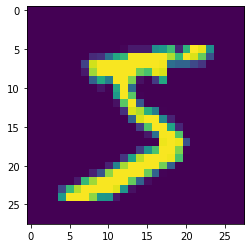

(50000, 26, 26, 2)


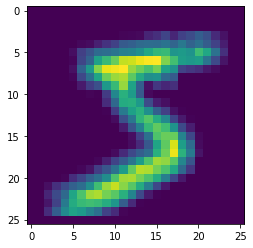

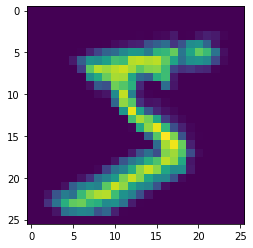

In [12]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#conv_forward = __import__('0-conv_forward').conv_forward
def conv_forward(A_prev, W, b, activation, padding="same", stride=(1, 1)):
    """ doc """
    m, imgh, imgw, c = A_prev.shape
    kh, kw, kc, knc = W.shape
    sh, sw = stride
    imghp, imgwp = 0, 0
    if padding == 'same':
        imghp = (((imgh - 1) * sh + kh - imgh) // 2) + int(kh%2==0)
        imgwp = (((imgw - 1) * sw + kw - imgw) // 2) + int(kw%2==0)

    if type(padding) == tuple:
        imghp, imgwp = padding
    imgh, imgw = (imgh-kh+2*imghp)//sh + 1, (imgw-kw+2*imgwp)//sw + 1
    output = np.zeros((m, imgh, imgw, knc))
    new = np.pad(A_prev, ((0, 0), (imghp, imghp),
                          (imgwp, imgwp), (0, 0)),
                 'constant', constant_values=0)
    for k in range(knc):
        for i in range(imgh):
            for j in range(imgw):
                output[:, i, j, k] = np.sum(new[:,
                                                i*sh:i*sh+kh,
                                                j*sw:j*sw+kw, :]
                                            * W[..., k],
                                            axis=(1, 2, 3))
    return activation(output)

if __name__ == "__main__":
    np.random.seed(0)
    lib = np.load('../data/MNIST.npz')
    X_train = lib['X_train']
    m, h, w = X_train.shape
    X_train_c = X_train.reshape((-1, h, w, 1))

    W = np.random.randn(3, 3, 1, 2)
    b = np.random.randn(1, 1, 1, 2)

    def relu(Z):
        return np.maximum(Z, 0)

    plt.imshow(X_train[0])
    plt.show()
    A = conv_forward(X_train_c, W, b, relu, padding='valid')
    print(A.shape)
    plt.imshow(A[0, :, :, 0])
    plt.show()
    plt.imshow(A[0, :, :, 1])
    plt.show()

(50000, 28, 28, 2)


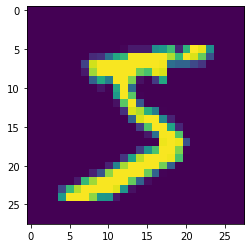

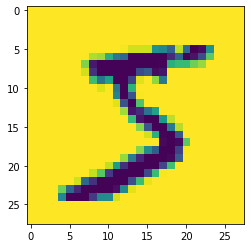

(50000, 14, 14, 2)


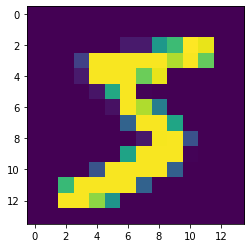

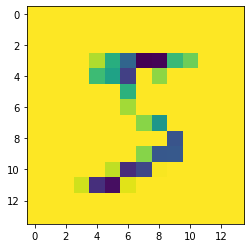

In [15]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#pool_forward = __import__('1-pool_forward').pool_forward
def pool_forward(A_prev, kernel_shape, stride=(1, 1), mode='max'):
    """ doc """
    m, imgh, imgw, c = A_prev.shape
    kh, kw = kernel_shape
    sh, sw = stride
    imgh, imgw = (imgh-kh)//sh + 1, (imgw-kw)//sw + 1
    output = np.zeros((m, imgh, imgw, c))

    for i in range(imgh):
        for j in range(imgw):
            if mode == 'max':
                output[:, i, j, :] = np.max(A_prev[:,
                                                   i*sh:i*sh+kh,
                                                   j*sw:j*sw+kw, :],
                                            axis=(1, 2))
            if mode == 'avg':
                output[:, i, j, :] = np.average(A_prev[:,
                                                       i*sh:i*sh+kh,
                                                       j*sw:j*sw+kw, :],
                                                axis=(1, 2))
    return output

if __name__ == "__main__":
    np.random.seed(0)
    lib = np.load('../data/MNIST.npz')
    X_train = lib['X_train']
    m, h, w = X_train.shape
    X_train_a = X_train.reshape((-1, h, w, 1))
    X_train_b = 1 - X_train_a
    X_train_c = np.concatenate((X_train_a, X_train_b), axis=3)

    print(X_train_c.shape)
    plt.imshow(X_train_c[0, :, :, 0])
    plt.show()
    plt.imshow(X_train_c[0, :, :, 1])
    plt.show()
    A = pool_forward(X_train_c, (2, 2), stride=(2, 2))
    print(A.shape)
    plt.imshow(A[0, :, :, 0])
    plt.show()
    plt.imshow(A[0, :, :, 1])
    plt.show()

In [17]:
#!/usr/bin/env python3
""" doc """
import numpy as np


def conv_backward(dZ, A_prev, W, b, padding="same", stride=(1, 1)):
    """ doc """
    m, imgh, imgw, c = dZ.shape
    kh, kw, kc, knc = W.shape
    sh, sw = stride
    imghp, imgwp = 0, 0
    if padding == 'same':
        imghp = (((imgh * sh) - sh + kh - imgh) // 2)
        imgwp = (((imgw * sw) - sw + kw - imgw) // 2)
    if type(padding) == tuple:
        imghp, imgwp = padding
    #imgh, imgw = (imgh-kh+2*imghp)//sh + 1, (imgw-kw+2*imgwp)//sw + 1
    #newDZ = np.zeros((m, imgh, imgw, knc))
    new = np.pad(A_prev, ((0, 0), (imghp, imghp),
                          (imgwp, imgwp), (0, 0)),
                 'constant', constant_values=0)
    db = np.sum(dZ, axis=(0, 1, 2), keepdims=True)
    """dZ = np.pad(dZ, ((0, 0), (imghp, imghp),
                     (imgwp, imgwp), (0, 0)),
                'constant', constant_values=0)"""
    newDZ = np.zeros(new.shape)
    dW = np.zeros_like(W)
    print(imgh, imgw)
    for n in range(m):
        for i in range(imgh):
            for j in range(imgw):
                for k in range(knc):
                    newDZ[n,
                          i*sh:i*sh+kh,
                          j*sw:j*sw+kw, :] += np.multiply(dZ[n, i, j, k],
                                                          W[..., k])
                    dW[..., k] += np.multiply(dZ[n, i, j, k],
                                              new[n,
                                                  i*sh:i*sh+kh,
                                                  j*sw:j*sw+kw, :])
    if padding == 'same':
        newDZ = newDZ[:, imghp:-imghp, imgwp:-imgwp, :]
    return newDZ, dW, db

    
if __name__ == "__main__":
    np.random.seed(0)
    lib = np.load('../data/MNIST.npz')
    X_train = lib['X_train']
    _, h, w = X_train.shape
    X_train_c = X_train[:10].reshape((-1, h, w, 1))

    W = np.random.randn(3, 3, 1, 2)
    b = np.random.randn(1, 1, 1, 2)

    dZ = np.random.randn(10, h - 2, w - 2, 2)
    dz, dw, db = conv_backward(dZ, X_train_c, W, b, padding="same")
    print(dz.shape, dZ.shape, X_train_c.shape, dw.shape, db.shape)

(10, 28, 28, 1) (10, 26, 26, 2) (10, 28, 28, 1) (3, 3, 1, 2) (1, 1, 1, 2)


In [ ]:
(10, 28, 28, 1) (3, 3, 1, 2) (1, 1, 1, 2) val

In [ ]:
newDZ = np.pad(np.zeros(new.shape), ((0, 0),
                   (imghp, imghp), (imgwp, imgwp), (0, 0)),
                   'constant', constant_values=0)

In [34]:
#!/usr/bin/env python3

import numpy as np
#pool_backward = __import__('3-pool_backward').pool_backward
def pool_backward(dA, A_prev, kernel_shape, stride=(1, 1), mode='avg'):
    """ doc """
    m, imgh, imgw, c = dA.shape
    kh, kw = kernel_shape
    sh, sw = stride
    imghp, imgwp = 0, 0

    new = A_prev
    newDA = np.zeros_like(A_prev)
    for n in range(m):
        for i in range(imgh):
            for j in range(imgw):
                for k in range(c):
                    if mode == 'max':
                        tmp = new[n,
                                  i*sh:i*sh+kh,
                                  j*sw:j*sw+kw, k]
                        mask = tmp == np.max(tmp)
                        newDA[n,
                              i*sh:i*sh+kh,
                              j*sw:j*sw+kw, k] += np.multiply(dA[n, i, j, k],
                                                              mask)
                    if mode == 'avg':
                        newDA[n,
                              i*sh:i*sh+kh,
                              j*sw:j*sw+kw, k] += dA[n, i, j, k]/kh/kw
    return newDA

if __name__ == "__main__":
    np.random.seed(0)
    lib = np.load('../data/MNIST.npz')
    X_train = lib['X_train']
    _, h, w = X_train.shape
    X_train_a = X_train[:10].reshape((-1, h, w, 1))
    X_train_b = 1 - X_train_a
    X_train_c = np.concatenate((X_train_a, X_train_b), axis=3)

    dA = np.random.randn(10, h // 3, w // 3, 2)
    print(pool_backward(dA, X_train_c, (3, 3), stride=(3, 3)))

[[[[ 0.19600582  0.04446191]
   [ 0.19600582  0.04446191]
   [ 0.19600582  0.04446191]
   ...
   [ 0.16600879 -0.02279536]
   [ 0.16600879 -0.02279536]
   [ 0.          0.        ]]

  [[ 0.19600582  0.04446191]
   [ 0.19600582  0.04446191]
   [ 0.19600582  0.04446191]
   ...
   [ 0.16600879 -0.02279536]
   [ 0.16600879 -0.02279536]
   [ 0.          0.        ]]

  [[ 0.19600582  0.04446191]
   [ 0.19600582  0.04446191]
   [ 0.19600582  0.04446191]
   ...
   [ 0.16600879 -0.02279536]
   [ 0.16600879 -0.02279536]
   [ 0.          0.        ]]

  ...

  [[ 0.26479387  0.10494217]
   [ 0.26479387  0.10494217]
   [ 0.26479387  0.10494217]
   ...
   [-0.05533694  0.21439245]
   [-0.05533694  0.21439245]
   [ 0.          0.        ]]

  [[ 0.26479387  0.10494217]
   [ 0.26479387  0.10494217]
   [ 0.26479387  0.10494217]
   ...
   [-0.05533694  0.21439245]
   [-0.05533694  0.21439245]
   [ 0.          0.        ]]

  [[ 0.          0.        ]
   [ 0.          0.        ]
   [ 0.          0. 

After 0 epochs: 2.3252415657043457 cost, 0.08457999676465988 accuracy, 2.3253190517425537 validation cost, 0.08659999817609787 validation accuracy
After 1 epochs: 1.4978840351104736 cost, 0.9639999866485596 accuracy, 1.4956576824188232 validation cost, 0.96670001745224 validation accuracy
After 2 epochs: 1.486056923866272 cost, 0.9754800200462341 accuracy, 1.4853111505508423 validation cost, 0.9768999814987183 validation accuracy
After 3 epochs: 1.4849005937576294 cost, 0.9764599800109863 accuracy, 1.4852842092514038 validation cost, 0.9758999943733215 validation accuracy
After 4 epochs: 1.4823172092437744 cost, 0.9788399934768677 accuracy, 1.4835917949676514 validation cost, 0.9775999784469604 validation accuracy
After 5 epochs: 1.4753093719482422 cost, 0.9859399795532227 accuracy, 1.4778465032577515 validation cost, 0.9836999773979187 validation accuracy
After 6 epochs: 1.477746844291687 cost, 0.9832599759101868 accuracy, 1.4812651872634888 validation cost, 0.9796000123023987 validat

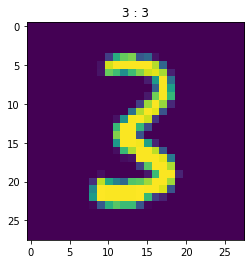

In [42]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#lenet5 = __import__('4-lenet5').lenet5
def lenet5(x, y):
    """ doc """
    init = tf.contrib.layers.variance_scaling_initializer()
    layer = tf.layers.Conv2D(6, 5, padding='same',
                             activation='relu',
                             kernel_initializer=init,
                            )(x)
    layer = tf.layers.MaxPooling2D(2, 2)(layer)
    layer = tf.layers.Conv2D(16, 5, padding='same',
                             activation='relu',
                             kernel_initializer=init,
                            )(layer)
    layer = tf.layers.MaxPooling2D(2, 2)(layer)
    layer = tf.layers.Flatten()(layer)
    layer = tf.layers.Dense(120, activation='relu',
                          kernel_initializer=init)(layer)
    layer = tf.layers.Dense(84, activation='relu',
                          kernel_initializer=init)(layer)
    layer = tf.layers.Dense(10, activation='softmax',
                          kernel_initializer=init)(layer)
    loss = tf.losses.softmax_cross_entropy(y, layer)
    train_op_adamOpt = tf.train.AdamOptimizer().minimize(loss)
    max_pred = tf.argmax(layer, 1)
    equal = tf.equal(tf.argmax(y, 1), max_pred)
    acc = tf.reduce_mean(tf.cast(equal, tf.float32))
    return layer, train_op_adamOpt, loss, acc

if __name__ == "__main__":
    np.random.seed(0)
    tf.set_random_seed(0)
    lib = np.load('../data/MNIST.npz')
    X_train = lib['X_train']
    Y_train = lib['Y_train']
    X_valid = lib['X_valid']
    Y_valid = lib['Y_valid']
    m, h, w = X_train.shape
    X_train_c = X_train.reshape((-1, h, w, 1))
    X_valid_c = X_valid.reshape((-1, h, w, 1))
    x = tf.placeholder(tf.float32, (None, h, w, 1))
    y = tf.placeholder(tf.int32, (None,))
    y_oh = tf.one_hot(y, 10)
    y_pred, train_op, loss, acc = lenet5(x, y_oh)
    batch_size = 32
    epochs = 10
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(epochs):
            cost, accuracy = sess.run((loss, acc), feed_dict={x:X_train_c, y:Y_train})
            cost_valid, accuracy_valid = sess.run((loss, acc), feed_dict={x:X_valid_c, y:Y_valid})
            print("After {} epochs: {} cost, {} accuracy, {} validation cost, {} validation accuracy".format(epoch, cost, accuracy, cost_valid, accuracy_valid))
            p = np.random.permutation(m)
            X_shuffle = X_train_c[p]
            Y_shuffle = Y_train[p]
            for i in range(0, m, batch_size):
                X_batch = X_shuffle[i:i+batch_size]
                Y_batch = Y_shuffle[i:i+batch_size]
                sess.run(train_op, feed_dict={x:X_batch, y:Y_batch})
        cost, accuracy = sess.run((loss, acc), feed_dict={x:X_train_c, y:Y_train})
        cost_valid, accuracy_valid = sess.run((loss, acc), feed_dict={x:X_valid_c, y:Y_valid})
        print("After {} epochs: {} cost, {} accuracy, {} validation cost, {} validation accuracy".format(epochs, cost, accuracy, cost_valid, accuracy_valid))
        Y_pred = sess.run(y_pred, feed_dict={x:X_valid_c, y:Y_valid})
        print(Y_pred[0])
        Y_pred = np.argmax(Y_pred, 1)
        plt.imshow(X_valid[0])
        plt.title(str(Y_valid[0]) + ' : ' + str(Y_pred[0]))
        plt.show()

In [ ]:
After 0 epochs: 2.3141989707946777 cost, 0.11590000241994858 accuracy, 2.313180446624756 validation cost, 0.11680000275373459 validation accuracy
After 1 epochs: 1.5019172430038452 cost, 0.960319995880127 accuracy, 1.5006712675094604 validation cost, 0.9611999988555908 validation accuracy
After 2 epochs: 1.489321231842041 cost, 0.9719600081443787 accuracy, 1.488608956336975 validation cost, 0.9722999930381775 validation accuracy
After 3 epochs: 1.4847922325134277 cost, 0.9764599800109863 accuracy, 1.4869818687438965 validation cost, 0.9745000004768372 validation accuracy

In [ ]:
#!/usr/bin/env python3

import tensorflow as tf
import numpy as np

lenet5 = __import__('4-lenet5').lenet5

np.random.seed(8)
m = np.random.randint(100, 200)
h, w = np.random.randint(20, 50, 2).tolist()

X = np.random.uniform(0, 1, (m, h, w, 1))
Y = np.random.randint(0, 10, m)

tf.set_random_seed(0)
x = tf.placeholder(tf.float32, (None, h, w, 1))
y = tf.placeholder(tf.int32, (None,))
y_oh = tf.one_hot(y, 10)
y_pred, train_op, loss, acc = lenet5(x, y_oh)
init = tf.global_variables_initializer()
with tf.Session() as sess:
      sess.run(init)
      for _ in range(50):
            print(sess.run([loss, acc, y_pred], feed_dict={x:X, y:Y}))
            sess.run(train_op, feed_dict={x:X, y:Y})
      print(sess.run([loss, acc, y_pred], feed_dict={x:X, y:Y}))